# RBF Kernel

Estudio de la influencia de los parámetros de un _kernel_ RBF sobre el hiperplano de decisión
de una SVM

In [1]:
# Librerias necesarias
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


# Llibreries necessaries per l'exemple de SVM
import numpy as np
from sklearn.svm import SVC

## Funciones de dibujo

El siguiente código no es objeto de esta asignatura. El código es original de la fuente de esta explicación.

In [2]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


## Generación de datos
Como ya hemos hecho en múltiples ocasiones, generamos datos con los que trabajar. Esta vez nos interesa que no sean
linealmente separables. Existen dos clases en nuestro vector Y: las cruces de color azul y los cuadrados de color rojo.

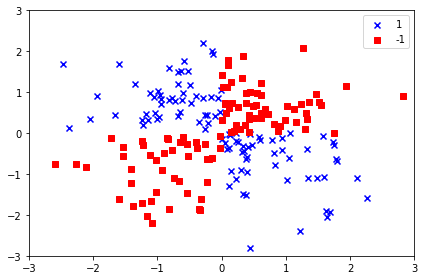

In [3]:
np.random.seed(33)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Clasificación mediante un SVM lineal

Como puede verse a continuación una SVM lineal no es muy buen clasificador para este problema, ya que los datos no son
linealmente separables. No buscamos los mejores hiperparámetros, puesto que es un ejemplo muy sencillo.

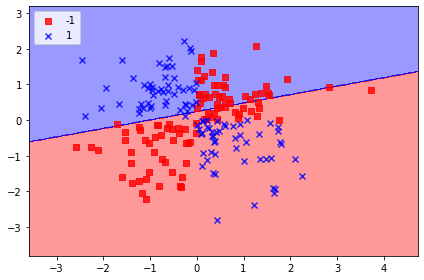

In [4]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Clasificación con un _Kernel_ RBF

El _kernel_ RBF tiene dos parámetros:

`gamma` es un parámetro del _kernel_ RBF y se puede considerar como la "extensión" del _kernel_ y, por tanto, la región de
decisión. Cuando la gama es baja, la "curva" del límite de decisión es muy baja y, por tanto, la región de decisión es muy amplia. Cuando la gama es alta, la "curva" del límite de decisión es alta, lo que crea islas de límites de decisión en torno a los puntos de datos. Esto lo veremos muy claro a continuación.

C

`C` es un parámetro propio de las SVM y es la penalización por clasificar erróneamente una observación. Cuando C es
pequeño, el clasificador está de acuerdo con los puntos de datos mal clasificados (alto sesgo, baja varianza). Cuando C es
grande, el clasificador penaliza mucho los datos erróneamente clasificados y, por tanto, evita cualquier observación
erróneamente clasificada (bajo sesgo, mayor varianza).

### Gama

En los cuatro gráficos siguientes, aplicamos el mismo clasificador SVM con _kernel_ RBF a los mismos datos mientras
mantenemos el hyperparámetro C constante. La única diferencia entre cada gráfico es que cada vez aumentaremos el valor de
gama. Al hacerlo, podemos ver visualmente el efecto de gama en el límite de decisión.

#### Gama = 0,01

En el caso de nuestro clasificador y datos SVM, cuando se utiliza una gama baja como 0,01, el margen de decisión no es
muy "curvado", sino que es sólo un gran arco.

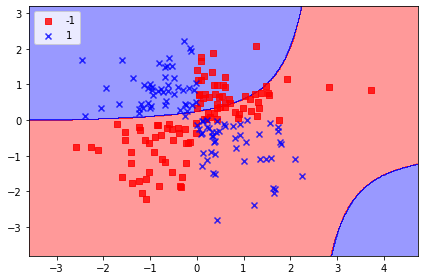

In [5]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gamma = 1.0

Podemos observar una gran diferencia cuando aumentamos la gama a 1. Ahora el límite de decisión comienza a cubrir mejor
el espacio que ocupan los datos de entrenamiento.

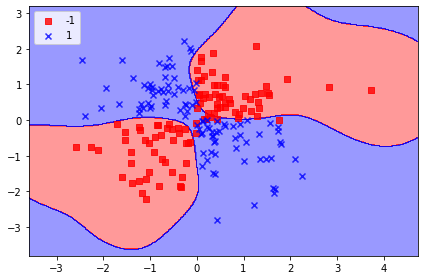

In [6]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gama = 10,0

En gama = 10 el límite de decisión comienza a estar muy afectado por puntos
de datos individuales (es decir, la varianza).

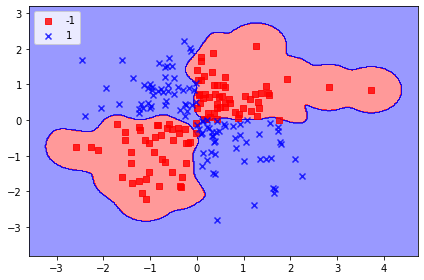

In [7]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### Gama = 100,0

Con un valor gama demasiado alto, el límite de decisión depende casi por completo de los puntos de datos individuales, creando
"islas". Estos datos están claramente sobre ajustados.

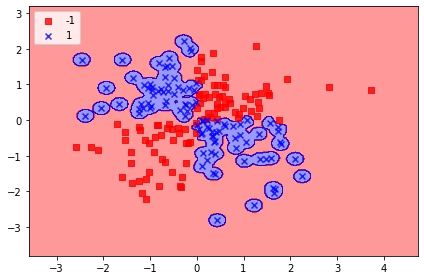

In [8]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C - El parámetro de penalización

Ahora repetiremos el proceso para C: utilizaremos el mismo clasificador, los mismos datos y mantendremos constante gama.
Lo único que vamos a cambiar es la C, la sanción por mala clasificación.

### C = 1

Con C = 1, el clasificador tolera claramente el punto de datos mal clasificado. Hay muchos puntos rojos en la región
azul y puntos azules en la región roja.

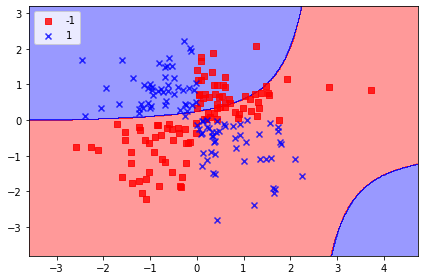

In [9]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### C = 10

A C = 10, el clasificador es menos tolerante a los puntos de datos mal clasificados y, por tanto, el límite de decisión
es más severo.

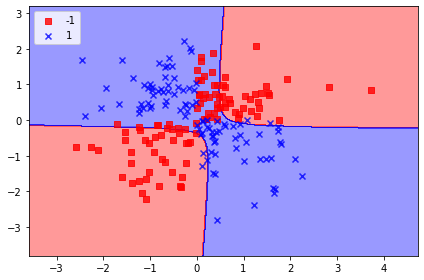

In [10]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Vamos a probar con valores de C más grandes: 100, 1000, 100000:

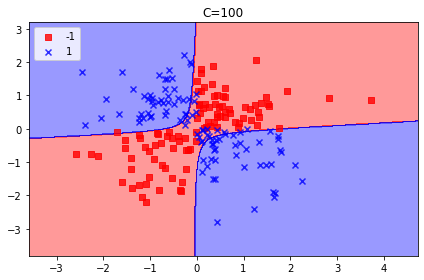

In [11]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=100")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

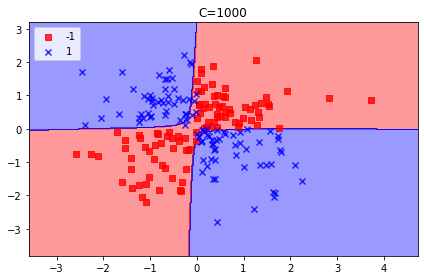

In [12]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=1000")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

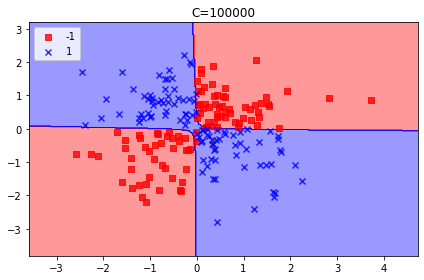

In [13]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=100000")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



Este código está extraído de [aquí](https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/)

